In [16]:
import pandas as pd

In [17]:
dataset = pd.read_csv("PrePlacementdata.csv")

In [18]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [19]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
import seaborn as sns

<Axes: xlabel='ssc_p', ylabel='Density'>

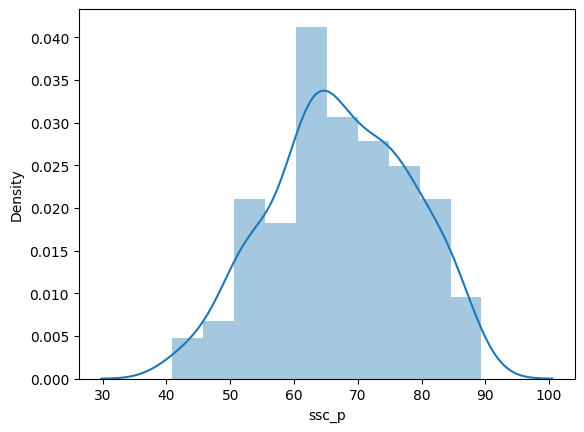

In [22]:
sns.distplot(dataset["ssc_p"])

In [23]:
def get_pdf_probability(dataset, startrange, endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset, kde = True, kde_kws = {'color': 'blue'}, color = 'Green')
    pyplot.axvline(startrange, color = 'Red')
    pyplot.axvline(endrange, color = 'Red')
    #generate a sample
    sample = dataset
    #caluclate parameters
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('Mean = %.3f, Standard Deviation = %.3f' % (sample_mean, sample_std))
    #define the distribution
    dist = norm(sample_mean, sample_std)

    #sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]
    probs = sum(probabilities)
    print("The area between range({}, {}): {}".format(startrange,endrange,sum(probabilities)))
    return probs

Mean = 67.303, Standard Deviation = 10.827
The area between range(60, 70): 0.3449514151280293


np.float64(0.3449514151280293)

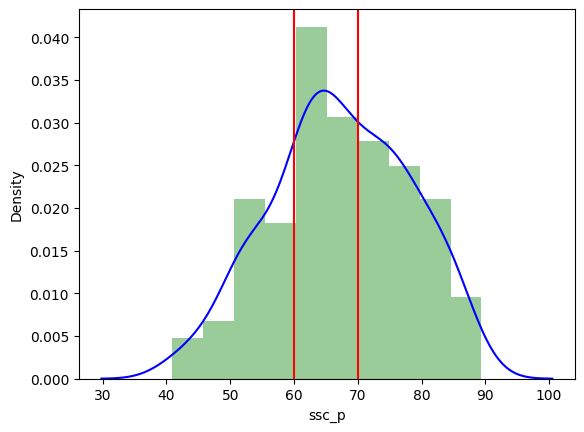

In [24]:
get_pdf_probability(dataset["ssc_p"], 60, 70)

In [25]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
ecdf(78)

np.float64(0.827906976744186)